In [34]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [26]:
# Load data
file_path = "GCB2022v27_MtCO2_flat.csv"
df_emission = pd.read_csv(file_path)
df_emission.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,1755,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,1756,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,1757,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,1758,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,1759,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_emission = df_emission.drop(columns=['Coal'])
df_emission

,Country,ISO 3166-1 alpha-3,Year,Total,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [29]:
filtered_df_after2000 =df_emission.loc[(df_emission['Year'] >= 2000)]
filtered_df_after2000
                     
                   

,Country,ISO 3166-1 alpha-3,Year,Total,Oil,Gas,Cement,Flaring,Other,Per Capita
250,Afghanistan,AFG,2000,1.047128,0.787760,0.223504,0.010216,0.021984,NaN,0.053581
251,Afghanistan,AFG,2001,1.069098,0.762112,0.208848,0.006538,0.021984,NaN,0.054300
252,Afghanistan,AFG,2002,1.340995,0.727438,0.547416,0.011033,0.000000,NaN,0.063856
253,Afghanistan,AFG,2003,1.559602,0.991575,0.466408,0.009807,0.000000,NaN,0.068871
254,Afghanistan,AFG,2004,1.237247,0.908672,0.227168,0.009807,0.000000,NaN,0.052529
...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [33]:
df_emission = filtered_df_after2000.loc[(filtered_df_after2000['Country'] == 'Global')]
df_emission

,Country,ISO 3166-1 alpha-3,Year,Total,Oil,Gas,Cement,Flaring,Other,Per Capita
63082,Global,WLD,2000,25453.622139,10302.090594,4731.291034,721.927315,278.928472,216.267121,4.139541
63083,Global,WLD,2001,25668.048326,10390.668975,4773.584851,754.331663,281.128017,213.078023,4.119578
63084,Global,WLD,2002,26281.037468,10385.864180,4905.853640,796.052479,298.553835,215.754196,4.163394
63085,Global,WLD,2003,27651.596453,10679.654448,5081.468111,852.252693,299.375515,220.382043,4.324685
63086,Global,WLD,2004,28636.695037,11042.504634,5257.190057,910.566319,323.802545,231.047147,4.422142
63087,Global,WLD,2005,29614.602256,11139.399176,5380.665522,964.306101,345.094230,241.802350,4.515677
63088,Global,WLD,2006,30593.116788,11246.321550,5506.809201,1051.668722,346.860142,252.616896,4.606415
63089,Global,WLD,2007,31506.789200,11283.665343,5694.133805,1129.389392,363.985324,259.255090,4.684364
63090,Global,WLD,2008,32085.836322,11251.325081,5864.291234,1143.738362,374.074157,259.610844,4.710472
63091,Global,WLD,2009,31564.030692,10996.948677,5751.954007,1175.729621,379.401924,243.568467,4.575621


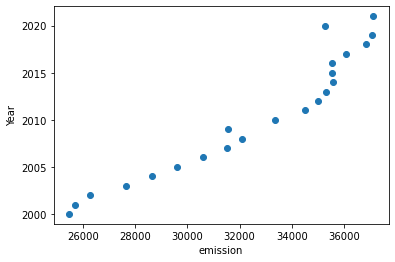

In [38]:
#linear regression
plt.scatter( df_emission.Total,df_emission.Year )
plt.xlabel('emission')
plt.ylabel('Year')
plt.show()

In [49]:
X = df_emission.Total.values.reshape(-1, 1)

In [50]:
X

array([[25453.622139],
       [25668.048326],
       [26281.037468],
       [27651.596453],
       [28636.695037],
       [29614.602256],
       [30593.116788],
       [31506.7892  ],
       [32085.836322],
       [31564.030692],
       [33364.346496],
       [34487.011618],
       [35006.267581],
       [35319.201624],
       [35577.534774],
       [35558.565735],
       [35524.193212],
       [36096.739276],
       [36826.5066  ],
       [37082.558969],
       [35264.085734],
       [37123.850352]])

In [51]:
X[:5]

array([[25453.622139],
       [25668.048326],
       [26281.037468],
       [27651.596453],
       [28636.695037]])

In [52]:
X.shape

(22, 1)

In [53]:
y = df_emission.Year

In [54]:
model = LinearRegression()

In [55]:
model.fit(X, y)

LinearRegression()

In [56]:
y_pred = model.predict(X)
print(y_pred.shape)

(22,)


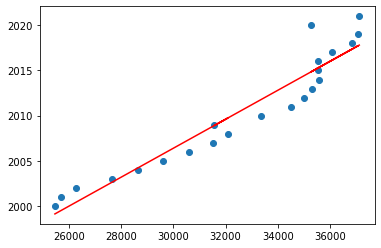

In [57]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [58]:
print(model.coef_)
print(model.intercept_)

[0.00160074]
1958.382244022499
